# Lab 7.07 - Time series analysis

In [ ]:
# Package imports for data science and time series analysis in particular
import numpy as np                                  # "Scientific computing"
import pandas as pd                                 # Dataframe
import scipy.stats as stats                         # Statistical tests

import matplotlib.pyplot as plt                     # Basic visualisation
import seaborn as sns                               # Advanced dataviz

from sklearn.linear_model import LinearRegression   # Linear regression model

# Time series analysis
from datetime import datetime
from sklearn.metrics import mean_absolute_error,mean_squared_error
from statsmodels.tsa.api import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose

## Exercise 7: golden cross

A *Golden Cross* is the name of a pattern that is used in the technical analysis of stock prices. A Golden Cross occurs when a short-term moving average breaks above a long-term moving average. This is an indicator for the potential of a major rally on the stock (*bull market*). The long-term moving average is then considered to be a "resistance level", i.e. when the stock price drops towards that level, it will often quickly bounce up again.

The dataset `SP500.csv` contains among others the closing price of the Standard & Poors 500, a stock market index tracking the performance of 500 large publicly traded companies in the USA. The data was collected by Hoseinzade & Haratizadeh (2019).

- Import the CSV-file in a DataFrame, parse the `Date` column as a date and set it as the index. We will only use the variable `Close`, so you can drop all other variables.
- Plot the time series to get an idea about the evolution over time of the S&P500 index.

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/SP500.csv', delimiter = ",", parse_dates=['Date']).set_index(['Date'])
data.head()

,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,ROC_20,...,NZD,silver-F,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU
Date,,,,,,,,,,,,,,,,,,,,,
2009-12-31,1115.099976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.03,0.26,-1.08,-1.00,-0.11,-0.08,-0.06,-0.48,0.30,0.39
2010-01-04,1132.989990,0.921723,0.016043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.52,3.26,1.61,1.62,-0.57,-0.59,-0.42,3.12,3.91,2.10
2010-01-05,1136.520020,-0.375903,0.003116,0.016043,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.07,1.96,-0.20,0.31,0.43,0.03,0.12,-0.90,1.42,-0.12
2010-01-06,1137.140015,0.996234,0.000546,0.003116,0.016043,NaN,NaN,NaN,NaN,NaN,...,0.56,2.15,-0.02,0.07,-0.56,-0.24,-0.17,2.62,2.25,1.77
2010-01-07,1141.689941,0.059932,0.004001,0.000546,0.003116,0.016043,NaN,NaN,NaN,NaN,...,-0.72,0.94,0.50,0.40,0.58,0.58,0.54,-1.85,0.22,-0.58


In [ ]:
# enkel close
data=data[['Close']]
data.head()

,Close
Date,
2009-12-31,1115.099976
2010-01-04,1132.989990
2010-01-05,1136.520020
2010-01-06,1137.140015
2010-01-07,1141.689941


Traders often use moving averages when analysing the evolution of stock prices. Specifically, the 50-day moving average is the average price over the last 10 trading weeks, making it a commonly used support level. Likewise, the 200-day moving average represents the average price over the past 40 weeks, which is used to suggest a relatively cheap price compared to the price range over most of the past year.

- Calculate the 50- and 200-day moving average and add the result as new columns in the DataFrame with names `MA50` and `MA200`, respectively.

In [ ]:
data['SMA50'] = data.Close.rolling(50).mean()
data['SMA200'] = data.Close.rolling(200).mean()
data.head(201)

,Close,SMA50,SMA200
Date,,,
2009-12-31,1115.099976,NaN,NaN
2010-01-04,1132.989990,NaN,NaN
2010-01-05,1136.520020,NaN,NaN
2010-01-06,1137.140015,NaN,NaN
2010-01-07,1141.689941,NaN,NaN
...,...,...,...
2010-10-12,1169.770020,1112.407200,NaN
2010-10-13,1178.099976,1113.560000,NaN
2010-10-14,1173.810059,1114.491401,NaN


- Plot the S&P500 index with both moving averages


<Axes: xlabel='Date'>

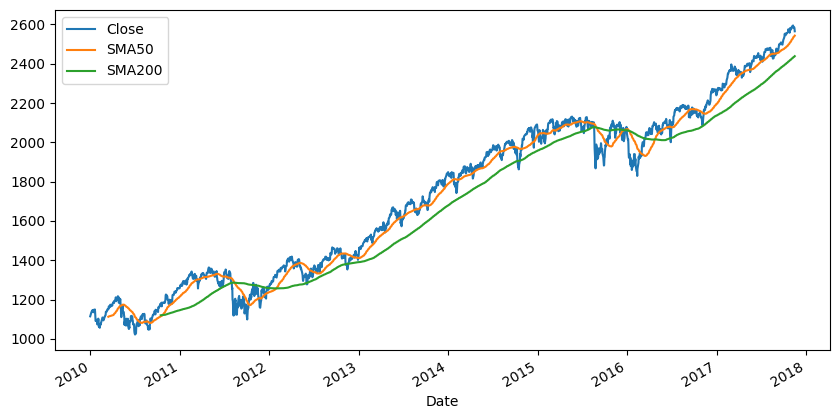

In [ ]:
data.plot(y=['Close', 'SMA50',	'SMA200'], figsize=[10,5])


- In August 2011, stock markets across the world [saw a sharp drop in stock prices](https://en.wikipedia.org/wiki/August_2011_stock_markets_fall), due to the [European sovereign debt crisis](https://en.wikipedia.org/wiki/European_debt_crisis). Look for that drop in the plot.
- After the 2011 stock markets fall, there are *two* occurrences of a golden cross.
- Both occurrences mark the beginning of long periods with a *bull market* (characterized by rising prices). If possible, identify how long each period lasted, i.e. when does the `MA50` drops below `MA200` again?
- Can you identify occurrences when the `MA200` effectively behaves like a support level?

## References

Hoseinzade, E., & Haratizadeh, S. (2019-09). *CNNpred: CNN-based stock market prediction using a diverse set of variables.* Expert Systems with Applications, **129,** pp. 273–285. https://doi.org/10.1016/j.eswa.2019.03.029